# Model 2: Unbiased and biased mutation

original: https://bookdown.org/amesoudi/ABMtutorial_bookdown/model2.html

### Note

- Evolution doesn’t work without a source of variation.
- In genetic evolution, mutation is almost always blind with respect to function.
- In cultural evolution, novel variation may sometimes be directed to solve specific problems, or systematically __biased__ due to features of our cognition.
- In the models below we’ll simulate both unbiased and biased mutation.

## Model 2a: Unbiased mutation

### Note

- First we will simulate unbiased mutation in the same basic model as used in Model 1 (Unbiased transmission).
- We’ll remove unbiased transmission to see the effect of unbiased mutation alone.
- Instead of random copying, each agent now gives rise to a new agent with exactly the same cultural trait as them.
- Each generation, there is a probability $\mu$ that each agent mutates from their current trait to the other trait.
- This probability applies to each agent independently.
- On average, that means that $\mu N$ agents mutate each generation.

In [1]:
include("src/Agent.jl")
include("src/Output.jl")
using .Agent
using .Output

In [2]:
flip = Agent.flip_AB
make_agent_df = Agent.make_agent_AB_df;

In [3]:
function unbiased_mutation(;N::Int64, r_max::Int64, t_max::Int64, p_0::Float64, μ::Float64)
    # N: population
    # r_max: number of independent runs
    # t_max: max of generations (t)
    outputs_df = make_output_df(r_max, t_max)

    for r = 1:r_max
        agents_df = make_agent_df(N, p_0)

        for t = 1:t_max
            if t > 1
                agents_df.trait = [rand() < μ ? flip(t) : t for t in agents_df.trait]
            end

            # get p and put it into the output slot for this generation t
            row_num = t + (r - 1) * t_max
            outputs_df.r[row_num] = r
            outputs_df.t[row_num] = t
            outputs_df.p[row_num] = trait_ratio(agents_df, A)
        end
    end

    plot_A(outputs_df, "N = $N, p_0 = $p_0, μ = $μ")
end;

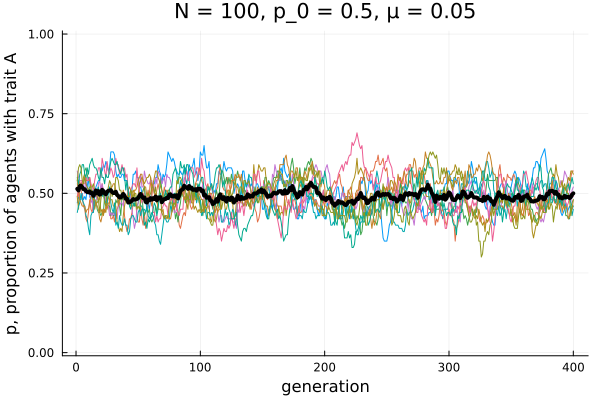

In [4]:
unbiased_mutation(N = 10^2, r_max = 10, t_max = 400, p_0 = 0.5, μ = 0.05)

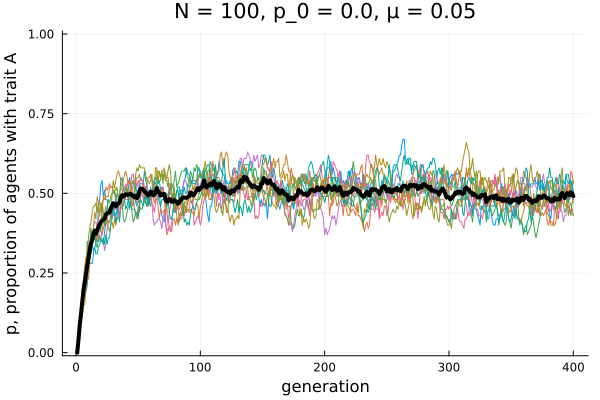

In [5]:
unbiased_mutation(N = 10^2, r_max = 10, t_max = 400, p_0 = 0.0, μ = 0.05)

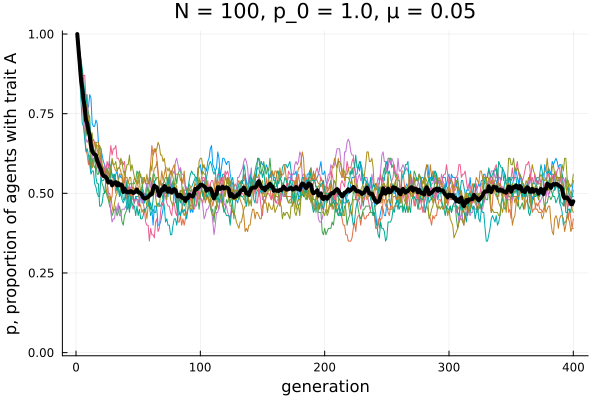

In [6]:
unbiased_mutation(N = 10^2, r_max = 10, t_max = 400, p_0 = 1.0, μ = 0.05)

### Note

- whatever the initial starting frequencies of $A$ and $B$, unbiased mutation always leads to $p = 0.5$.
- Unlike the unbiased transmission simulated in Model 1, with unbiased mutation it is impossible for one trait to be lost and the other go to fixation.
- Unbiased mutation introduces and maintains cultural variation in the population.

## Model 2b: Biased mutation

In [7]:
function biased_mutation(;N::Int64, r_max::Int64, t_max::Int64, p_0::Float64, μ::Float64)
    # N: population
    # r_max: number of independent runs
    # t_max: max of generations (t)
    outputs_df = make_output_df(r_max, t_max)

    for r = 1:r_max
        agents_df = make_agent_df(N, p_0)

        for t = 1:t_max
            if t > 1
                agents_df.trait = [t == B && rand() < μ ? flip(t) : t for t in agents_df.trait]
            end

            # get p and put it into the output slot for this generation t
            row_num = t + (r - 1) * t_max
            outputs_df.r[row_num] = r
            outputs_df.t[row_num] = t
            outputs_df.p[row_num] = trait_ratio(agents_df, A)
        end
    end

    plot_A(outputs_df, "N = $N, p_0 = $p_0, μ = $μ")
end;

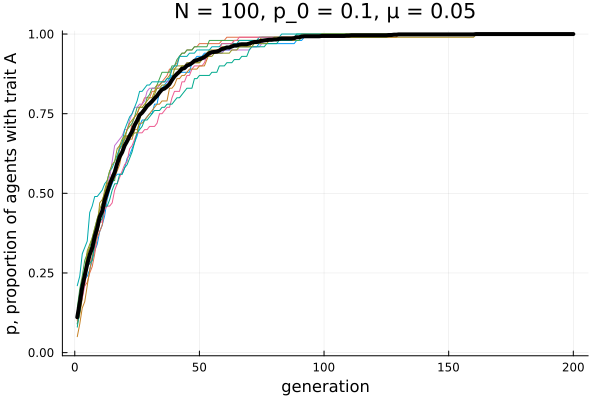

In [8]:
biased_mutation(N = 10^2, r_max = 10, t_max = 200, p_0 = 0.1, μ = 0.05)

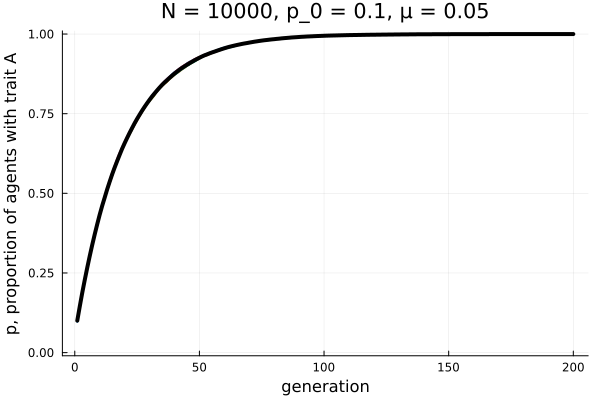

In [9]:
biased_mutation(N = 10^4, r_max = 10, t_max = 200, p_0 = 0.1, μ = 0.05)

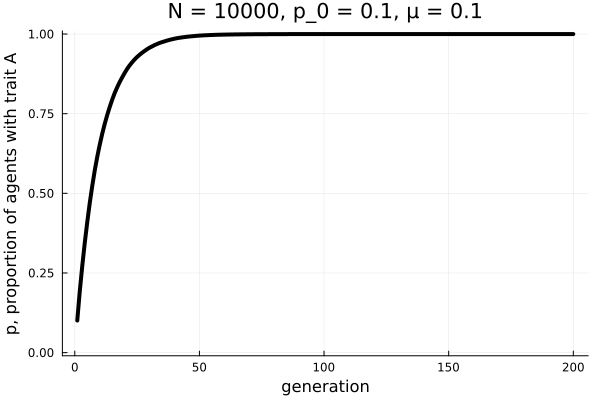

In [10]:
biased_mutation(N = 10^4, r_max = 10, t_max = 200, p_0 = 0.1, μ = 0.1)

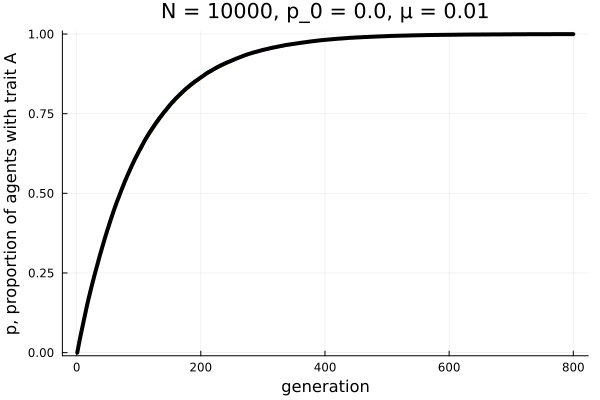

In [11]:
biased_mutation(N = 10^4, r_max = 10, t_max = 800, p_0 = 0.0, μ = 0.01)

### Note

- Unbiased mutation
    - Unbiased mutation, which resembles genetic mutation in being non-directional, always leads to an equal mix of the two traits.
    - It introduces and maintains cultural variation in the population.
    - While unbiased transmission did not change $p$ over time, unbiased mutation always converges on $p =0.5$, irrespective of the starting frequency.
    - A form of unbiased cultural mutation can be observed when people try to copy artifact sizes or shapes, and the limits of our perceptual systems introduces random noise into the copied form (Eerkens & Lipo 2005)(Kempe et al. 2012).
- Biased mutation
    - Novel traits favoured by biased mutation spread in a characteristic fashion - an r-shaped diffusion curve - with a speed characterised by the mutation rate $\mu$.
    - Population size has little effect.
    - This is because mutation is an individual-level process, and does not depend on the traits of any other agent(s) in the population.
    - Whenever biased mutation is present, the favoured trait goes to fixation, even if it is not initially present.
    - Biased cultural mutation has been argued to result from universal features of human cognition, as different people or groups independently transform cultural traits towards certain ‘attractive’ forms (Morin 2013)(Miton et al. 2015).

## Model 2c: Unbiased mutation (3 traits version)

In [12]:
flip = Agent.flip_ABC
make_agent_df = Agent.make_agent_ABC_df;

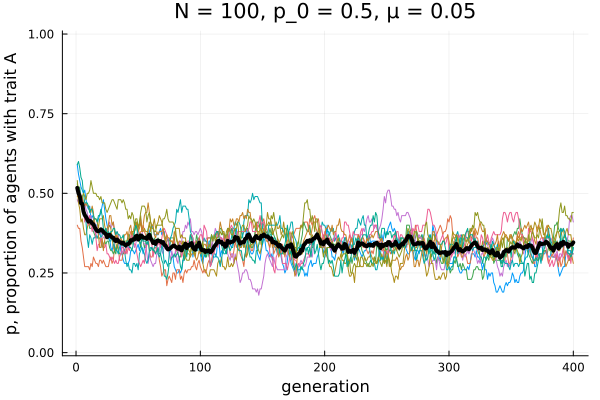

In [13]:
unbiased_mutation(N = 10^2, r_max = 10, t_max = 400, p_0 = 0.5, μ = 0.05)

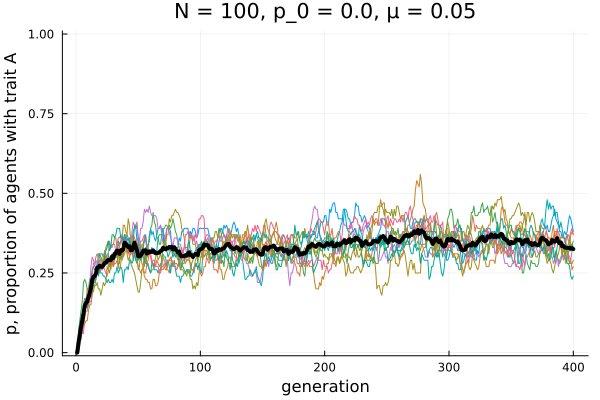

In [14]:
unbiased_mutation(N = 10^2, r_max = 10, t_max = 400, p_0 = 0.0, μ = 0.05)

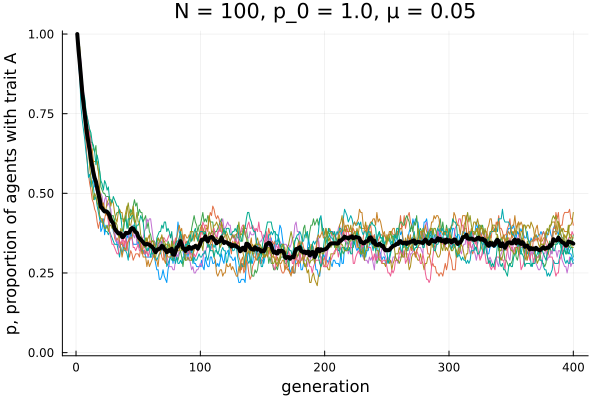

In [15]:
unbiased_mutation(N = 10^2, r_max = 10, t_max = 400, p_0 = 1.0, μ = 0.05)

## Analytical Solution

- $p$: proportion of A in current generation.
- $p'$: proportion of A in next generation.
- $p^*$: equilibrium of $p$.
- $\mu$: mutation rate. ($1 \ge \mu > 0$)

### Unbiased mutation (2 traits)

$p' = p (1 - \mu) + (1 - p) \mu$

$p^* = p^* (1 - \mu) + (1 - p^*) \mu$

$\mu (1 - 2p^*) = 0$

$\therefore p^* = \frac{1}{2}$

### Unbiased mutation ($n$ traits ($n > 1$))

$p' = p (1 - \mu) + (1 - p) \frac{\mu}{n - 1}$

$p^* = p^* (1 - \mu) + (1 - p^*) \frac{\mu}{n - 1}$

$\mu (\frac{1}{n - 1} - \frac{n}{n - 1} p^*) = 0$

$\therefore p^* = \frac{1}{n}$

### Biased mutation ($n$ traits ($n > 1$))

$p' = p + (1 - p) \frac{\mu}{n - 1}$

$p^* = p^* + (1 - p^*) \frac{\mu}{n - 1}$

$\therefore p^* = 1$